In [12]:
import pandas as pd
import numpy as np
import math
#import matplotlib as mpl
#mpl.use('pgf')
import matplotlib
matplotlib.style.use('ggplot')

import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [13]:
data = './data/data/improved-dataset/turnstile_weather_v2.csv'
df = pd.read_csv(data)

In [14]:
def SubPlot(ax,title):
    # construct y,x-ticks, axis labels for histograms:
    # construct y-ticks:
    Ymax = 0.00062
    dytick = 0.00004
    yticks = math.ceil(Ymax/dytick)
    
    ax.set_ylim(ymin=0,ymax = Ymax)
    ax.set_yticks([ i * dytick for i in range(yticks) ])
    ax.set_xlim(xmin=0,xmax=15000)
    ax.set_xlabel("Hourly Entries", fontsize = 11)
    ax.set_title(title)
    
    plt.xticks( rotation = -90 )

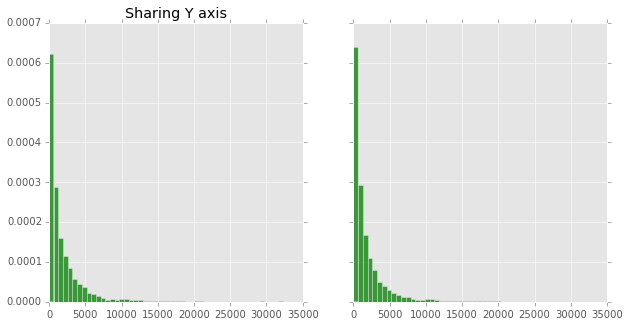

In [22]:
rainy = df[df.rain == 1]['ENTRIESn_hourly'].values
norain = df[df.rain == 0]['ENTRIESn_hourly'].values

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(
    1, 
    2, 
    sharey=True,
    figsize=(10, 5), 
    dpi=300, 
    facecolor='w', 
    edgecolor='k'
)
n, bins, patches = ax1.hist(rainy, 50, normed=1, facecolor='green', alpha=0.75)
n, bins, patches = ax2.hist(norain, 50, normed=1, facecolor='green', alpha=0.75)

ax1.set_title('Sharing Y axis')

plt.savefig('histogram-rainy-norain.pdf')

ax1.hist(
    x, 
    alpha=1,
    bins = 45,
    normed = 1,
    label='Histogram of Rainy Days'
)

In [ ]:
type(df[df.rain == 1].ENTRIESn_hourly)

In [ ]:

fig = plt.figure(num=None, 
                 figsize=(10, 5), 
                 dpi=300, 
                 facecolor='w', 
                 edgecolor='k'
                )

ax1 = fig.add_subplot(121)
titleR = 'Histogram of Rainy Days'
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xticks( rotation = -90 )
histRainy = df[df.rain == 1].ENTRIESn_hourly.plot(kind='hist', 
                                      alpha=1,
                                      bins = 45,
                                      normed = 1,
                                      label='Histogram of Rainy Days'
                                     )

ax2 = fig.add_subplot(122)
titleNR = 'Histogram of Non-rainy Days'
plt.tick_params(axis='both', which='major', labelsize=8)

histNoRain = df[df.rain == 0].ENTRIESn_hourly.plot(kind='hist', 
                                      alpha=0.5,
                                      bins = 45,
                                      normed = 1,
                                      label='Histogram of Non-Rainy Days'
                                     )


   
SubPlot(ax1,titleR) 

SubPlot(ax2,titleNR)
    
plt.tight_layout()
plt.savefig('histogram-rainy-norain.pdf')

```python
pgf_with_lualatex = {
    "text.usetex": True,
    "pgf.rcfonts": False,   # Do not set up fonts from rc parameters.
    "pgf.texsystem": "lualatex",
    "pgf.preamble": [
        r'\usepackage{verbatim}',
        r'\usepackage{newtxmath}',
        r'\usepackage[T1]{fontspec}',
        r'\usepackage{newtxtext}',
    ]
}
mpl.rcParams.update(pgf_with_lualatex)
```

In [ ]:
normRain = df[df.rain == 1].ENTRIESn_hourly.count()
normNonRain = df[df.rain == 0].ENTRIESn_hourly.count()
print(normRain,normNonRain)

Ymax = 0.00062
dtick = 0.00002
ticks = math.ceil(Ymax/tick) + 1

In [ ]:
df.head(n=53)

In [ ]:
# nice pseudo-transparent legend: 
#leg = plt.legend(loc=1,fancybox=True, fontsize=14)
#leg.get_frame().set_alpha(0.5)

#plt.ylabel('number of occurrences')
#plt.title('Histograms Rainy vs Non-rainy Days')

plt.figure();
plt.xlabel('ENTRIESn_hourly')
#plt.ylabel('Number of occurences')
plt.title('Histogram of ENTRIESn_hourly')

#plt.ylim(0,100)
histo = df.ENTRIESn_hourly.sort(inplace = False)
fit = stats.norm.pdf(histo,histo.mean(),histo.std())
plt.plot(histo,fit,'-o')

df.ENTRIESn_hourly.hist(alpha=0.5,normed=True)
plt.savefig('histogram_entries.pdf')

In [ ]:
stats.mstats.normaltest(histo)

In [ ]:
weekends = df[df.weekday == 0]['ENTRIESn_hourly']
weekdays = df[df.weekday == 1]['ENTRIESn_hourly']

In [ ]:
df.ENTRIESn_hourly.mean()

In [ ]:
import scipy
p_shapiro = scipy.stats.shapiro(df.ENTRIESn_hourly);
p_dandp = scipy.stats.mstats.normaltest(df.ENTRIESn_hourly);
print(p_shapiro,p_dandp)
print(scipy.stats.ks_2samp(weekends,weekdays),'\n',\
      scipy.stats.mannwhitneyu(weekends,weekdays))

In [ ]:
import scipy
p_KS = 'The p-value using the one sided Kolmogorov-Smirnov test is:'
p_MW = 'The p-value using the one sided Mann-Whitney test is:'
mean_WE = 'The mean ENTRIESn_hourly for the weekend is:'
mean_WD = 'The mean ENTRIESn_hourly for the weekday is:'
print(p_KS, scipy.stats.ks_2samp(weekends,weekdays)[1], \
      '\n' + p_MW, scipy.stats.mannwhitneyu(weekends,weekdays)[1], \
      '\n' + mean_WE, weekends.mean(), \
      '\n' + mean_WD, weekdays.mean())

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
df[df.rain == 1].ENTRIESn_hourly.plot(kind='hist', 
                                      alpha=1,
                                      bins = 45,
                                      label='Histogram of Rainy Days'
                                     )
df[df.rain == 0].ENTRIESn_hourly.plot(kind='hist', 
                                      alpha=0.5,
                                      bins = 45,
                                      label='Histogram of Rainy Days'
                                     )
leg = plt.legend(loc=2,fancybox=True, fontsize=14)
leg.get_frame().set_alpha(0.5)

#plt.xlabel('\verb|ENTRIESn_hourly|')
plt.ylabel('number of occurrences')
plt.title('Histograms Rainy vs Non-rainy Days')
plt.ylim(ymin=0,ymax=10000)
plt.xlim(xmin=0,xmax=15000)